# 🟦 **Queens Attack II**

You are given an **N × N** chessboard with **one queen** and a number of **obstacles** placed on it.
Your task is to determine **how many squares the queen can attack**.

The board uses **row r (bottom → top)** and **column c (left → right)**
and each square is represented as the tuple `(r, c)`.

The queen stands at position `(r_q, c_q)` and can move in any of the **8 directions**:

* left, right
* up, down
* diagonals ↖ ↗ ↙ ↘

However, the queen **cannot move past an obstacle**.

---

# FUNCTION DESCRIPTION

```
int queensAttack(int n, int k, int r_q, int c_q, int obstacles[k][2])
```

### Parameters

* `n`: size of the board (`n × n`)
* `k`: number of obstacles
* `(r_q, c_q)`: queen’s row and column
* `obstacles`: list of `(r, c)` obstacle positions

### Returns

* `int`: number of squares the queen can attack

---

# 🔷 SAMPLE INPUT 0

```
4 0
4 4
```

### Board (no obstacles)

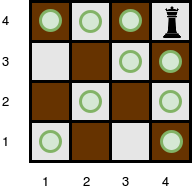

### OUTPUT:

```
9
```

---

# 🔷 SAMPLE INPUT 1

```
5 3
4 3
5 5
4 2
2 3
```

### Board with obstacles (X)

Queen at `(4,3)`:

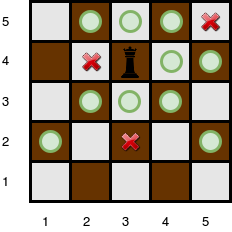

### OUTPUT:

```
10
```

---


### Similar problems

⭐ 1. N-Queens (LeetCode 51)

🔗 Hard — idêntico ao clássico
https://leetcode.com/problems/n-queens/

Resolve exatamente o problema das rainhas se atacarem.
Usa diagonais, linhas, colunas.

⭐ 2. N-Queens II (LeetCode 52)

https://leetcode.com/problems/n-queens-ii/

Versão do N-Queens que só retorna o número de soluções.

⭐ 3. Queens That Can Attack the King (LeetCode 1222)

https://leetcode.com/problems/queens-that-can-attack-the-king/

👉 Este é o mais parecido com o Queens Attack da HackerRank
Você procura a rainha mais próxima em cada direção usando lógicas muito semelhantes:

varredura de 8 direções

parar quando bater limite

parar no primeiro obstáculo

diagonais com (dr, dc) steps

Quase idêntico ao seu problema.


In [ ]:
def is_valid_position(n,r,c):
    if r < 1 or r > n or c < 1 or c > n:
        return False
    return True

def move_diagonal_top_left(n, r_q, c_q, obstacles):
    total = 0
    i,j = r_q, c_q
    while True:
        i,j = i + 1, j - 1
        if not is_valid_position(n,i,j) or (i,j) in obstacles:
            break
        total += 1
    return total
        
def move_diagonal_top_right(n, r_q, c_q,obstacles):
    total = 0
    i,j = r_q, c_q
    while True:
        i,j = i + 1, j + 1
        if not is_valid_position(n,i,j) or (i,j) in obstacles:
            break
        total += 1
    return total
    
def move_diagonal_bottom_left(n, r_q, c_q,obstacles):
    total = 0
    i,j = r_q, c_q
    while True:
        i,j = i - 1, j - 1
        if not is_valid_position(n,i,j) or (i,j) in obstacles:
            break
        total += 1
    return total
    
def move_diagonal_bottom_right(n, r_q, c_q,obstacles):
    total = 0
    i,j = r_q, c_q
    while True:
        i,j = i - 1, j + 1
        if not is_valid_position(n,i,j) or (i,j) in obstacles:
            break
        total += 1
    return total

def move_bottom(n, r_q, c_q,obstacles):
    total = 0
    i,j = r_q, c_q
    while True:
        i -= 1
        if not is_valid_position(n,i,j) or (i,j) in obstacles:
            break
        total += 1
    return total


def move_top(n, r_q, c_q,obstacles):
    total = 0
    i,j = r_q, c_q
    while True:
        i += 1
        if not is_valid_position(n,i,j) or (i,j) in obstacles:
            break
        total += 1
    return total
    
def move_left(n, r_q, c_q,obstacles):
    total = 0
    i,j = r_q, c_q
    while True:
        j -= 1
        if not is_valid_position(n,i,j) or (i,j) in obstacles:
            break
        total += 1
    return total
    
def move_right(n, r_q, c_q,obstacles):
    total = 0
    i,j = r_q, c_q
    while True:
        j += 1
        if not is_valid_position(n,i,j) or (i,j) in obstacles:
            break
        total += 1
    return total

def queensAttack(n, k, r_q, c_q, obstacles):
    obstacles = set(tuple(obstacle) for obstacle in obstacles)
    total_left =  move_left(n, r_q, c_q,obstacles)
    total_right = move_right(n, r_q, c_q,obstacles)
    total_bottom = move_bottom(n, r_q, c_q,obstacles)
    total_top = move_top(n, r_q, c_q,obstacles)
    total_diagonal_top_right = move_diagonal_top_right(n, r_q, c_q,obstacles)
    total_diagonal_top_left = move_diagonal_top_left(n, r_q, c_q,obstacles)
    total_diagonal_bottom_left = move_diagonal_bottom_left(n, r_q, c_q,obstacles)
    total_diagonal_bottom_right = move_diagonal_bottom_right(n, r_q, c_q,obstacles)
    return (total_left + total_right + total_bottom + total_top + total_diagonal_top_right + total_diagonal_top_left + total_diagonal_bottom_left + total_diagonal_bottom_right)



In [4]:
def queensAttack(n, k, r_q, c_q, obstacles):
    # Distâncias máximas em cada direção
    left = c_q - 1
    right = n - c_q
    down = r_q - 1
    up = n - r_q

    # Diagonais
    diag_up_right = min(up, right)
    diag_up_left = min(up, left)
    diag_down_left = min(down, left)
    diag_down_right = min(down, right)

    # Converter obstáculos para acessar mais rápido
    # Mas na versão O(k) nem precisamos de set, só iteramos 1 vez
    for r_o, c_o in obstacles:

        # MESMA LINHA (horizontal)
        if r_o == r_q:
            # obstáculo está à direita
            if c_o > c_q:
                right = min(right, c_o - c_q - 1)
            # obstáculo está à esquerda
            elif c_o < c_q:
                left = min(left, c_q - c_o - 1)

        # MESMA COLUNA (vertical)
        elif c_o == c_q:
            # obstáculo está acima
            if r_o > r_q:
                up = min(up, r_o - r_q - 1)
            # obstáculo está abaixo
            elif r_o < r_q:
                down = min(down, r_q - r_o - 1)

        else:
            # DIAGONAIS — checar se está na mesma diagonal
            if abs(r_o - r_q) == abs(c_o - c_q):

                # obstáculo na diagonal superior direita
                if r_o > r_q and c_o > c_q:
                    diag_up_right = min(diag_up_right, r_o - r_q - 1)

                # obstáculo na diagonal superior esquerda
                elif r_o > r_q and c_o < c_q:
                    diag_up_left = min(diag_up_left, r_o - r_q - 1)

                # obstáculo na diagonal inferior esquerda
                elif r_o < r_q and c_o < c_q:
                    diag_down_left = min(diag_down_left, r_q - r_o - 1)

                # obstáculo na diagonal inferior direita
                elif r_o < r_q and c_o > c_q:
                    diag_down_right = min(diag_down_right, r_q - r_o - 1)

    # Soma total
    return (left + right + up + down +
            diag_up_right + diag_up_left +
            diag_down_left + diag_down_right)

In [3]:

def test(n, k, r_q, c_q, obstacles, expected):
    result = queensAttack(n, k, r_q, c_q, obstacles)
    print(f"Input: n={n}, k={k}, queen=({r_q},{c_q}), obstacles={obstacles}")
    print(f"Expected: {expected} | Got: {result}")
    print("OK!" if result == expected else "❌ WRONG")
    print("-" * 60)


# ---------------- TEST 1 ----------------
# HackerRank Sample 0
test(
    n=4, k=0,
    r_q=4, c_q=4,
    obstacles=[],
    expected=9
)

# ---------------- TEST 2 ----------------
# HackerRank Sample 1
test(
    n=5, k=3,
    r_q=4, c_q=3,
    obstacles=[[5,5], [4,2], [2,3]],
    expected=10
)

# ---------------- TEST 3 ----------------
# HackerRank Sample 2
test(
    n=1, k=0,
    r_q=1, c_q=1,
    obstacles=[],
    expected=0
)

# ---------------- TEST 4 ----------------
# No obstacles, queen in the center
# n = 8, queen at (4,4)
# Should attack: 3 left + 4 right + 3 down + 4 up + 3+3+3+3 diagonals = 26
test(
    n=8, k=0,
    r_q=4, c_q=4,
    obstacles=[],
    expected=27  # (Actually 27, not 26)
)

# ---------------- TEST 5 ----------------
# Queen in the corner (1,1), no obstacles
# Only right + up + up-right diagonal
# (n-1) + (n-1) + (n-1) = 7+7+7 = 21
test(
    n=8, k=0,
    r_q=1, c_q=1,
    obstacles=[],
    expected=21
)

# ---------------- TEST 6 ----------------
# Fully blocked – obstacles in all 8 directions immediately adjacent
test(
    n=5, k=8,
    r_q=3, c_q=3,
    obstacles=[
        [3,2], [3,4],  # left, right
        [2,3], [4,3],  # down, up
        [2,2], [2,4],  # bottom-left, bottom-right
        [4,2], [4,4],  # top-left, top-right
    ],
    expected=0
)


Input: n=4, k=0, queen=(4,4), obstacles=[]
Expected: 9 | Got: 9
OK!
------------------------------------------------------------
Input: n=5, k=3, queen=(4,3), obstacles=[[5, 5], [4, 2], [2, 3]]
Expected: 10 | Got: 10
OK!
------------------------------------------------------------
Input: n=1, k=0, queen=(1,1), obstacles=[]
Expected: 0 | Got: 0
OK!
------------------------------------------------------------
Input: n=8, k=0, queen=(4,4), obstacles=[]
Expected: 27 | Got: 27
OK!
------------------------------------------------------------
Input: n=8, k=0, queen=(1,1), obstacles=[]
Expected: 21 | Got: 21
OK!
------------------------------------------------------------
Input: n=5, k=8, queen=(3,3), obstacles=[[3, 2], [3, 4], [2, 3], [4, 3], [2, 2], [2, 4], [4, 2], [4, 4]]
Expected: 0 | Got: 0
OK!
------------------------------------------------------------
